In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Reading [Water Quality](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/) dataset

INITIALIZE Water Quality dataset (load data)

In [2]:
data_df = pd.read_csv('waterQuality1.csv') #read csv
data_df.head() #output names of columns

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

#### Preprocessing Data of Water Quality

In [4]:
data_df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
# Знайдемо рядки зі значенням "#NUM!" і видалимо їх з набору даних
data_df = data_df[data_df != '#NUM!'].dropna()
data_df.shape

(7996, 21)

In [6]:
# Змінюємо тип даних стовпців 'ammonia' та 'is_safe' на стандартний для всіх float64
data_df['ammonia'] = data_df['ammonia'].astype(float)
data_df['is_safe'] = data_df['is_safe'].astype(float)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

#### Split data

In [8]:
X = data_df.drop(['is_safe'], axis = 1)
y = data_df['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
X.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


#### Standardize the Variables

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

#### AdaBoost model

Під час навчання ансамбль побудує ансамбль базових класифікаторів, які будуть використовуватися для прийняття колективних класифікаційних рішень.

**n_estimators** -- вказує на кількість базових класифікаторів, які будуть об'єднані в ансамбль <br>
**learning_rate** -- відображає швидкість навчання ансамблю.

In [12]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(scaled_X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [13]:
pred = abc.predict(scaled_X_test)

#### Evaluation

In [18]:
print(confusion_matrix(y_test,pred))

[[1391   28]
 [  86   95]]


* LeftTop - кількість True Negatives (TN). Вказує на кількість прикладів, які були правильно класифіковані як негативні (клас 0). <br>

* RightTop - кількість False Positives (FP). Вказує на кількість прикладів, які були неправильно класифіковані як позитивні (клас 1), коли насправді вони належать до класу 0. <br>

* LeftDown - кількість False Negatives (FN). Вказує на кількість прикладів, які були неправильно класифіковані як негативні (клас 0), коли насправді вони належать до класу 1. <br>

* RightDown - кількість True Positives (TP). Вказує на кількість прикладів, які були правильно класифіковані як позитивні (клас 1). <br>

На основі отриманих даних можемо обчислити різні метрики класифікації, такі як точність, чутливість, специфічність, F1-показник та інші, щоб оцінити якість нашої моделі класифікації.

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1419
         1.0       0.77      0.52      0.62       181

    accuracy                           0.93      1600
   macro avg       0.86      0.75      0.79      1600
weighted avg       0.92      0.93      0.92      1600



Precision (точність):  
* при 0.0 - %TP, вказує на низьку\високу точність, модель має низьку\високу кількість хибно позитивних. <br>
* при 1.0 - %TP, вказує на те, що модель має менше\більше хибно позитивних для цього класу. <br>

Recall (чутливість): 
* при 0.0 - %TP, вказує на низьку\високу чутливість моделі для класу 0.0.
* при 1.0 - %TP, вказує на меншу\більшу чутливість для класу 1.0.

F1-Score (F1-показник) є гармонічним середнім точності та чутливості:
* при 0.0 - вказує на погану\добру якість моделі для класу 0.0.
* при 1.0 - вказує на те, що модель може бути менш\більш ефективною у класифікації цього класу.

Support: кількість прикладів у кожному класі у тестовому наборі даних.

Accuracy (точність): загальна точність моделі, яка вказує на те, наскільки часто модель правильно класифікує приклади.

Macro Avg: середнє значення метрик для всіх класів. В нашому випадку, середнє значення точності, чутливості і F1-показника для всіх класів.

Weighted Avg: середнє значення метрик для всіх класів, де кожен клас зважується на підтримку (кількість прикладів) відповідного класу.

In [21]:
print(accuracy_score(y_test,pred)) #відсоток правильних класифікацій

0.92875


#### Choosing parameter

Аналіз впливу кількості базових класифікаторів в ансамблі AdaBoost на середню помилку класифікації. <br>
Також визначимо оптимальну кількість базових класифікаторів для даної задачі.

* **n_estimators** -- кількість базових класифікаторів, які будуть використовуватися в ансамблі (#тих, хто погано навчається, для повторного навчання). <br>
* **learning_rate** -- коефіцієнт навчання. Сприяє вазі слабких учнів. Використовує 1 як значення за замовчуванням.

In [22]:
error_rate = []

for i in range(1,50):
    abc = AdaBoostClassifier(n_estimators=i, learning_rate=1)
    abc.fit(scaled_X_train, y_train)
    pred_i = abc.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

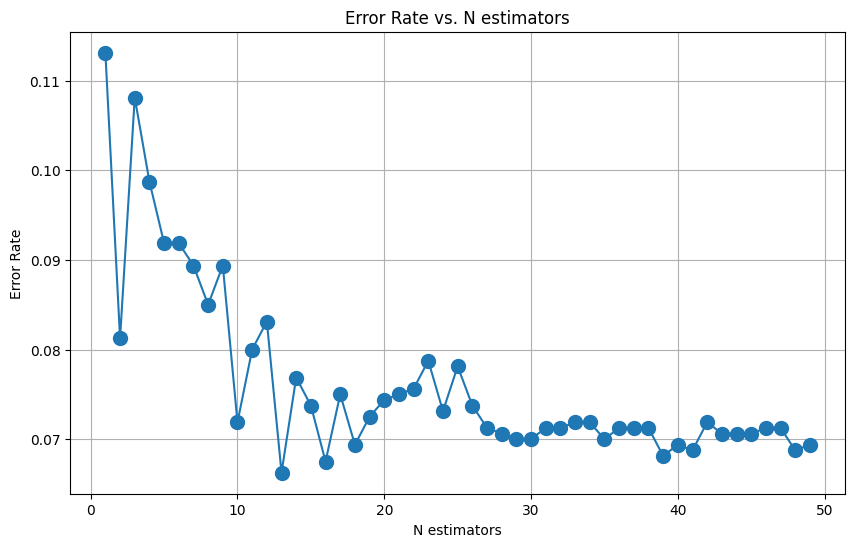

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. N estimators')
plt.xlabel('N estimators')
plt.ylabel('Error Rate')
plt.grid()

Тепер проведемо аналіз впливу різних значень швидкості навчання на помилки класифікації для моделі AdaBoostClassifier. <br>
Також визначимо оптимальне значення швидкості навчання для даної задачі.

In [24]:
error_rate = []

for i in range(1,20):
    abc = AdaBoostClassifier(n_estimators=5, learning_rate=i)
    abc.fit(scaled_X_train, y_train)
    pred_i = abc.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

Модель AdaBoostClassifier з фіксованою кількістю базових класифікаторів (n_estimators=5) та різними значеннями швидкості навчання.

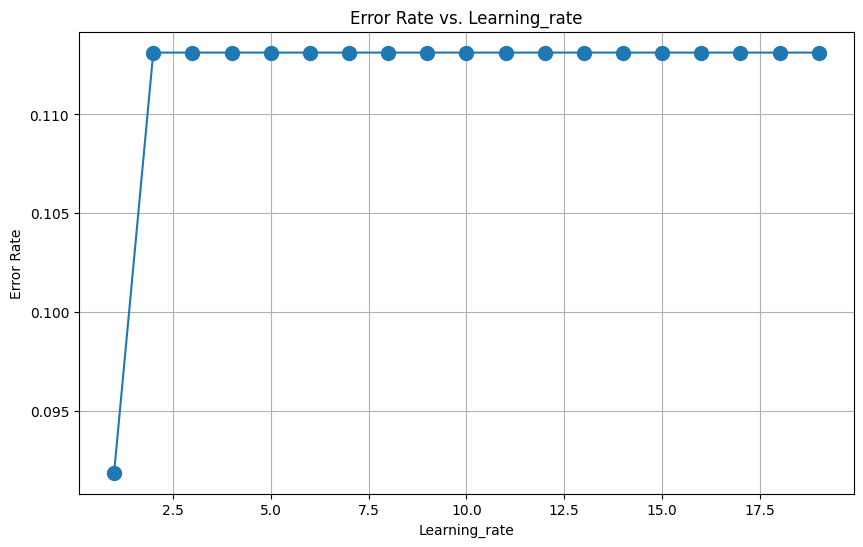

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. Learning_rate')
plt.xlabel('Learning_rate')
plt.ylabel('Error Rate')
plt.grid()

In [27]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

abc.fit(scaled_X_train, y_train)
pred = abc.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[1391   28]
 [  86   95]]

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1419
         1.0       0.77      0.52      0.62       181

    accuracy                           0.93      1600
   macro avg       0.86      0.75      0.79      1600
weighted avg       0.92      0.93      0.92      1600



##### Для матриці: 
* LeftTop - кількість True Negatives (TN). Вказує на кількість прикладів, які були правильно класифіковані як негативні (клас 0). <br>

* RightTop - кількість False Positives (FP). Вказує на кількість прикладів, які були неправильно класифіковані як позитивні (клас 1), коли насправді вони належать до класу 0. <br>

* LeftDown - кількість False Negatives (FN). Вказує на кількість прикладів, які були неправильно класифіковані як негативні (клас 0), коли насправді вони належать до класу 1. <br>

* RightDown - кількість True Positives (TP). Вказує на кількість прикладів, які були правильно класифіковані як позитивні (клас 1). <br>

На основі отриманих даних можемо обчислити різні метрики класифікації, такі як точність, чутливість, специфічність, F1-показник та інші, щоб оцінити якість нашої моделі класифікації.

##### Для звіту:

Precision (точність):  
* при 0.0 - %TP, вказує на низьку\високу точність, модель має низьку\високу кількість хибно позитивних. <br>
* при 1.0 - %TP, вказує на те, що модель має менше\більше хибно позитивних для цього класу. <br>

Recall (чутливість): 
* при 0.0 - %TP, вказує на низьку\високу чутливість моделі для класу 0.0.
* при 1.0 - %TP, вказує на меншу\більшу чутливість для класу 1.0.

F1-Score (F1-показник) є гармонічним середнім точності та чутливості:
* при 0.0 - вказує на погану\добру якість моделі для класу 0.0.
* при 1.0 - вказує на те, що модель може бути менш\більш ефективною у класифікації цього класу.

Support: кількість прикладів у кожному класі у тестовому наборі даних.

Accuracy (точність): загальна точність моделі, яка вказує на те, наскільки часто модель правильно класифікує приклади.

Macro Avg: середнє значення метрик для всіх класів. В нашому випадку, середнє значення точності, чутливості і F1-показника для всіх класів.

Weighted Avg: середнє значення метрик для всіх класів, де кожен клас зважується на підтримку (кількість прикладів) відповідного класу.